In [1]:
import pmlib
import numpy as np

In [ ]:
# list pmlib functionalities
dir(pmlib)


In [2]:
# We create a PM instance for a stochatic 3-armed Bernoulli Multi-Armed Bandit (MAB)
# the parameters are the independent expected arm rewards
print "** Bandit problem"
bandit = pmlib.BernoulliBandit([0.75,0.5,0.25])

** Bandit problem


***** 3-armed bandit *****
Actions: N=3 Outcomes: M=8

Loss Matrix (with actions as row indices and outcomes as column indices):


,000,001,010,011,100,101,110,111
arm 0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
arm 1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
arm 2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0



Feedback Matrix (symbolic form):


,000,001,010,011,100,101,110,111
arm 0,loss,loss,loss,loss,win,win,win,win
arm 1,loss,loss,win,win,loss,loss,win,win
arm 2,loss,win,loss,win,loss,win,loss,win


Feedback Matrix (numeric form):


,000,001,010,011,100,101,110,111
arm 0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
arm 1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
arm 2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0



Outcomes distribution (for stochastic games):
P(000)=0.09375 P(001)=0.03125 P(010)=0.09375 P(011)=0.03125 P(100)=0.28125 P(101)=0.09375 P(110)=0.28125 P(111)=0.09375

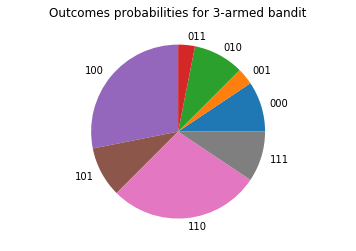

In [3]:
# show the PM game matrices and outcomes distributions
bandit.dump(plot=True, nice=True)

# note that for this example we have 3 actions (one for each arm) 
# and 2^3 outcomes (one for each possible reward vector)


In [ ]:
# We can also consider bandits with strongly correlated arms
# by specifying a for instance an outcome distribution 
# where only two arms can be winning at the same time
bandit.OutcomeDist = np.array([0,0,0,1/3.,0,1/3.,1/3.,0])
bandit.dump(plot=True, nice=True)


In [ ]:
# Other well known instances of PM are dynamic pricing and Apple tasting

dp = pmlib.DynamicPricingPM([0.1,0.1,0.7,0.1], 2.)
at = pmlib.AppleTasting([0.05,0.95])

at.dump(nice=True)


In [4]:
# We can also create a dueling bandit instance where the action is a couple of arms 
# and the feedback is the relative reward.
print "** Dueling bandit problem"    
dueling = pmlib.BinaryUtilityDuelingBanditPM([0.75,0.5,0.5,0.25])
dueling.dump(plot=False,nice=True)

** Dueling bandit problem
***** 4-armed utility-based dueling bandit *****
Actions: N=10 Outcomes: M=16

Loss Matrix (with actions as row indices and outcomes as column indices):


,0000,0001,0010,0011,0100,0101,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111
"(0,0)",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0,1)",1.0,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0
"(0,2)",1.0,1.0,0.5,0.5,1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.5,0.0,0.0
"(0,3)",1.0,0.5,1.0,0.5,1.0,0.5,1.0,0.5,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.0
"(1,1)",1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
"(1,2)",1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.0,1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.0
"(1,3)",1.0,0.5,1.0,0.5,0.5,0.0,0.5,0.0,1.0,0.5,1.0,0.5,0.5,0.0,0.5,0.0
"(2,2)",1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
"(2,3)",1.0,0.5,0.5,0.0,1.0,0.5,0.5,0.0,1.0,0.5,0.5,0.0,1.0,0.5,0.5,0.0
"(3,3)",1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0



Feedback Matrix (symbolic form):


,0000,0001,0010,0011,0100,0101,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111
"(0,0)",tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie
"(0,1)",tie,tie,tie,tie,loss,loss,loss,loss,win,win,win,win,tie,tie,tie,tie
"(0,2)",tie,tie,loss,loss,tie,tie,loss,loss,win,win,tie,tie,win,win,tie,tie
"(0,3)",tie,loss,tie,loss,tie,loss,tie,loss,win,tie,win,tie,win,tie,win,tie
"(1,1)",tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie
"(1,2)",tie,tie,loss,loss,win,win,tie,tie,tie,tie,loss,loss,win,win,tie,tie
"(1,3)",tie,loss,tie,loss,win,tie,win,tie,tie,loss,tie,loss,win,tie,win,tie
"(2,2)",tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie
"(2,3)",tie,loss,win,tie,tie,loss,win,tie,tie,loss,win,tie,tie,loss,win,tie
"(3,3)",tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie


Feedback Matrix (numeric form):


,0000,0001,0010,0011,0100,0101,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111
"(0,0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0,1)",0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
"(0,2)",0.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
"(0,3)",0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
"(1,1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1,2)",0.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0
"(1,3)",0.0,-1.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,-1.0,0.0,-1.0,1.0,0.0,1.0,0.0
"(2,2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2,3)",0.0,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0
"(3,3)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Outcomes distribution (for stochastic games):
P(0000)=0.046875 P(0001)=0.015625 P(0010)=0.046875 P(0011)=0.015625 P(0100)=0.046875 P(0101)=0.015625 P(0110)=0.046875 P(0111)=0.015625 P(1000)=0.140625 P(1001)=0.046875 P(1010)=0.140625 P(1011)=0.046875 P(1100)=0.140625 P(1101)=0.046875 P(1110)=0.140625 P(1111)=0.046875


In [ ]:
# The present version only include 4 variants of FeedExp3 algorithm.
# The BasicFeedexp3 class only works with some forms of numeric feedback matrices where
# there exists an NxN matrix K such that L=KF (See Piccolboni & Schindelhauer 2000).
# The GeneralFeedexp3 uses Cell decomposition to handle more general forms of feedbacks.
# The eta and gamma parameters can be optimized for known horizon.
# When these parameters are set to zero we use an anytime version whith dynamic eta and gamma parameters
# as specified in (Cesa-Bianchi et al. 2006).

from multiprocessing import cpu_count
nbCores = max(1,cpu_count() - 2)
nbReps = nbCores*2
horizon = 10000

pm_game = pmlib.AppleTasting([0.05,0.95])

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10.,7.]


eta, gamma = pmlib.optimal_Feedexp3_parameters(pm_game, horizon)
gfx3 = pmlib.GeneralFeedexp3(pm_game, eta , gamma)
cumRegrets1 = pmlib.eval_policy_parallel(nbCores, nbReps, horizon, pm_game, gfx3)
pmlib.init_plot("Average regret curve")
pmlib.plot_regret(cumRegrets1, mylabel= "General FeedExp3 (known horizon)", mycolor = 'green')
pmlib.show_plot()
    

** FeedExp3
kstar= 2.0 eta0= 0.238399498807 gamma0= 10.7590383801
13 x 13 Link matrix
Loss estimation error: 1.21075620751e-14
nbCores: 38 nbReps: 76 Horizon: 10000
** Rex3
Number of arms: K=4
nbCores: 38 nbReps: 76 Horizon: 10000
** Random
nbCores: 38 nbReps: 76 Horizon: 10000


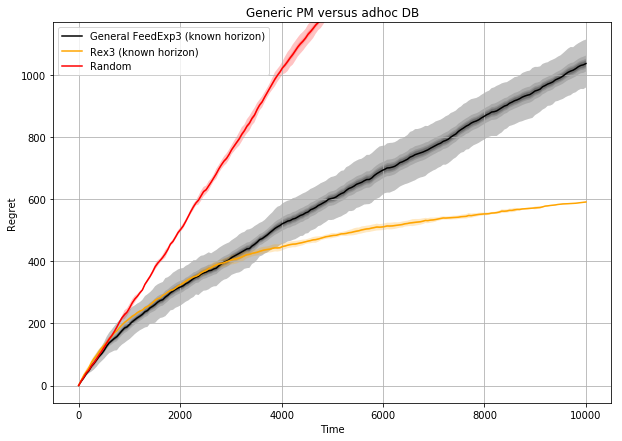

In [6]:
# for dueling bandit we can compare with an adhoc algorithm: rex3:

def plot_game(pm_game):

    # Feedexp3
    print "** FeedExp3"
    eta, gamma = pmlib.optimal_Feedexp3_parameters(pm_game, horizon)
    gfx3 = pmlib.GeneralFeedexp3(pm_game, eta , gamma)
    cumRegrets1 = pmlib.eval_policy_parallel(nbCores, nbReps, horizon, pm_game, gfx3)

    #Rex3
    if pm_game.game_type=="dueling":
        print "** Rex3"
        rex3 = pmlib.Rex3(pm_game, pmlib.optimal_gamma(pm_game, horizon))
        cumRegrets2 = pmlib.eval_policy_parallel(nbCores, nbReps, horizon, pm_game, rex3)

    # Random
    print "** Random"
    baseline = pmlib.BasicPolicy(pm_game)
    cumRegrets3 = pmlib.eval_policy_parallel(nbCores, nbReps, horizon, pm_game, baseline)

    pmlib.init_plot("Generic PM versus adhoc DB")
    pmlib.plot_regret(cumRegrets1, mylabel= "General FeedExp3 (known horizon)", mycolor = 'black')
    if pm_game.game_type=="dueling":
        pmlib.plot_regret(cumRegrets2, mylabel= "Rex3 (known horizon)", mycolor = 'orange')
    pmlib.plot_regret(cumRegrets3, mylabel= "Random", mycolor = 'red', autoscale = False)
    pmlib.show_plot()
    

plot_game(dueling)

# It is an open question whether a general PM algorithm can be as tight as an adhoc dueling bandits algorithm.



In [ ]:
# we provide a list of benchmark games settings:
horizon = 1000
nbReps = nbCores


for i in range(len(pmlib.benchmark_games)):
    print
    print
    print "*****", pmlib.benchmark_names[i], "*****"
    game = pmlib.benchmark_games[i]
    game.dump(plot=False, nice = True) # set plot=True to plot the outcome distributions
    plot_game(game)

In [ ]:
# For Cell decomposition we use the ppl library
import ppl

pm_game = pmlib.BinaryUtilityDuelingBanditPM([0.75,0.5])
pm_game.dump(nice=True)


Lmat = pm_game.LossMatrix

print "Loss matrix:"
print Lmat
for i in range(Lmat.shape[0]):
    print 
    print "Domination matrix for action", pm_game.Actions_dict[i], ":"
    print pmlib.domination_matrix(i,Lmat)
    print "Strict Domination polytope:", pmlib.StrictDominationPolytope(i,Lmat).minimized_generators()
    print "Strict Domination polytope:", pmlib.StrictDominationPolytope(i,Lmat).minimized_constraints()
    print "strictly dominating:", pmlib.isStrictlyNonDominated(i,Lmat)
    print "Domination polytope:", pmlib.DominationPolytope(i,Lmat).minimized_generators()
    print "dominating:", pmlib.isNonDominated(i,Lmat)
    print "degenerated:", pmlib.isDegenerated(i,Lmat)
    print "Pareto Optimal:", pmlib.isParetoOptimal(i, Lmat)
    
